In [1]:
install.packages("dplyr")
install.packages("nortest")
# install.packages("epiR")
#install.packages("sf")
# install.packages("sf", repos = "https://cloud.r-project.org/")



Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpkQjcCd/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpkQjcCd/downloaded_packages


In [2]:
library(tibble)
library(tidyr)
library(dplyr)
library(ggplot2)
library(nortest)
# library(epiR) # doesn't work


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# 1

# (a)
# Import the file melanoma.csv as a tibble called melanoma.

In [4]:
melanoma <- readr::read_csv("melanoma.csv")

Rows: 205 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (7): time, status, sex, age, year, thickness, ulcer

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# (b)
# Determine type and scale of all variables.

In [6]:
glimpse(melanoma)

Rows: 205
Columns: 7
$ time      <dbl> 10, 30, 35, 99, 185, 204, 210, 232, 232, 279, 295, 355, 386,~
$ status    <dbl> 3, 3, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, ~
$ sex       <dbl> 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, ~
$ age       <dbl> 76, 56, 41, 71, 52, 28, 77, 60, 49, 68, 53, 64, 68, 63, 14, ~
$ year      <dbl> 1972, 1968, 1977, 1968, 1965, 1971, 1972, 1974, 1968, 1971, ~
$ thickness <dbl> 6.76, 0.65, 1.34, 2.90, 12.08, 4.84, 5.16, 3.22, 12.88, 7.41~
$ ulcer     <dbl> 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~


In [7]:
# (c)
# Change the values of the variables
# sex, status, ulcer to strings
# describing their values and
# add a new variable live.status describing
# whether the patient is alive or dead.

In [8]:
melanoma <- melanoma %>%
  mutate(
    status = factor(status, labels = c("Alive", "Dead", "Unrelated")),
    sex = factor(sex, labels = c("Male", "Female")),
    ulcer = factor(ulcer, labels = c("Present", "Absent")),
    live.status = ifelse(status == "Alive", "Alive", "Dead")
  )

In [9]:
# Convert 'sex' to factor with labels Male and Female
melanoma$sex <- factor(melanoma$sex, labels = c("Male", "Female"))

In [10]:
# Convert 'status' to factor with labels Alive and Dead
melanoma$status <- factor(melanoma$status,
                          labels = c("Alive", "Dead", "Unrelated"))

In [11]:
# Convert 'ulcer' to factor with labels Present and Absent
melanoma$ulcer <- factor(melanoma$ulcer, labels = c("Present", "Absent"))

# Create 'live.status' variable based on 'status'
melanoma$live.status <- ifelse(melanoma$status == "Alive", "Alive", "Dead")

In [12]:
# Check unique levels of 'status'
unique_levels <- unique(melanoma$status)
unique_levels


[1] Unrelated Dead      Alive    
Levels: Alive Dead Unrelated

In [13]:
melanoma

time,status,sex,age,year,thickness,ulcer,live.status
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
10,Unrelated,Female,76,1972,6.76,Absent,Dead
30,Unrelated,Female,56,1968,0.65,Present,Dead
35,Dead,Female,41,1977,1.34,Present,Dead
99,Unrelated,Male,71,1968,2.90,Present,Dead
185,Alive,Female,52,1965,12.08,Absent,Alive
204,Alive,Female,28,1971,4.84,Absent,Alive
210,Alive,Female,77,1972,5.16,Absent,Alive
232,Unrelated,Male,60,1974,3.22,Absent,Dead
232,Alive,Female,49,1968,12.88,Absent,Alive


In [14]:
# (d)
# Create a contingency table for the variables sex and live.status.

In [15]:
table(melanoma$sex, melanoma$live.status)

        
         Alive Dead
  Male      28   98
  Female    29   50

In [16]:
# Sidenote

# A contingency table displays frequency/count of observations for
# categorical variables. Each cell represents frequency of a combination
# of values. Used to explore relationships between variables and for
# chi-square tests of independence.

In [17]:
# (e) - COULDN'T SOLVE IT
# Evaluate the relative risks to survive at least 3 years for the variable
# sex and interpret the values.

# Problem
# the solution from chatgpt isn't possible because I need some
# library which I can't download
# perhaps Shama has some other answer.
# Maybe there is some approach in Exercise 3 or 4.

In [18]:
# riskratio(
#          table(melanoma$sex, melanoma$status)[, "Alive"],
#           rev(table(melanoma$sex, melanoma$status)[, "Dead"]))

In [19]:
# (f)
# Create a summary describing the distribution of the variable age
# containing min, max, mean, the three quartiles depending on the variable
# sex.

In [22]:
summary_stats <- melanoma %>%
  group_by(sex) %>%
  summarise(
    min_age = min(age),
    max_age = max(age),
    mean_age = mean(age),
    Q1 = quantile(age, 0.25),
    median_age = median(age),
    Q3 = quantile(age, 0.75)
  )
summary_stats

sex,min_age,max_age,mean_age,Q1,median_age,Q3
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,4,89,51.56349,42.0,54,64.75
Female,12,95,53.89873,43.5,55,66.50


In [ ]:
# (g)
# Create side by side boxplots for the age of persons depending on their
# sex and interpret the diagram.

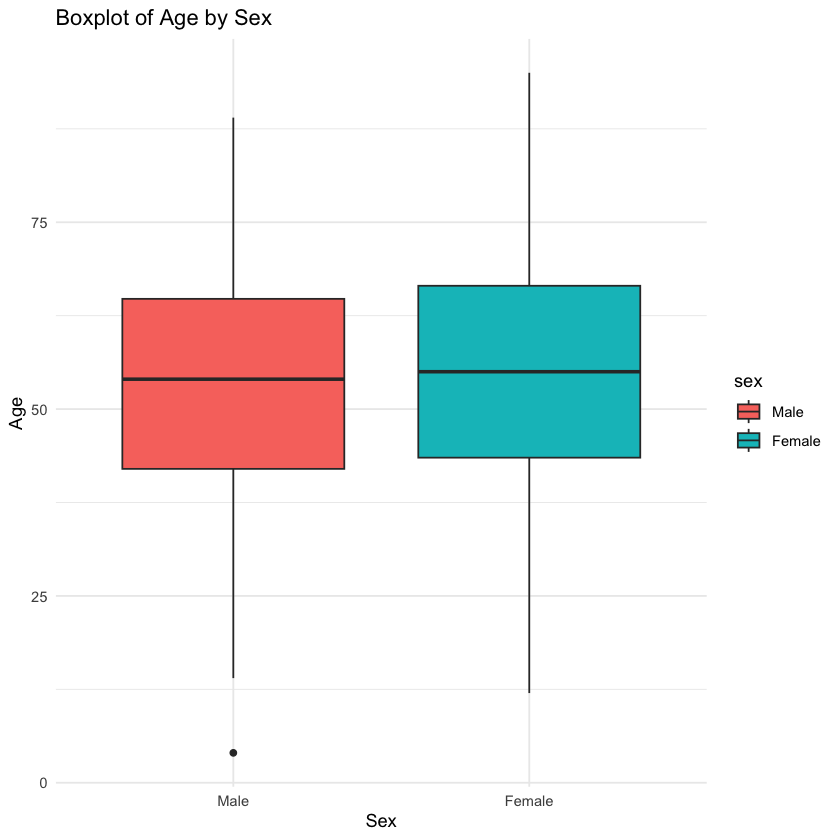

In [23]:
ggplot(melanoma, aes(x = sex, y = age, fill = sex)) +
  geom_boxplot() +
  labs(title = "Boxplot of Age by Sex",
       x = "Sex",
       y = "Age") +
  theme_minimal()

In [ ]:
# (h)
# The csv file add.data.melanoma.csv contains data from another study.
# Import the dataset as a tibble called add.data.melanoma.

In [25]:
add.data.melanoma <- readr::read_csv("add.data.melanoma.csv")

Rows: 20 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): sex_age_year
dbl (4): time, status, thickness, ulcer

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
# (i)
# Is this dataset tidy? (add-data-melanoma)
add.data.melanoma
# To check if the dataset is tidy, we need to assess if each variable forms
# a column, each observation forms a row, and each type of observational
# unit forms a table. Further information about the structure of the dataset
# and its variables would be needed to make a determination.

# My Solution Proposal:
# obviously sex_age_year is already the giveaway that the dataset
# isn't tidy at all.
# also time is kinda weird and ulcer is only 0

time,status,thickness,ulcer,sex_age_year
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
809,2,11.70,0,0/72/1978
1687,3,6.22,0,0/61/1990
1711,3,13.98,0,0/30/1977
682,3,5.06,0,0/72/1987
1034,2,15.38,0,0/71/1977
625,1,7.66,0,0/21/1983
248,2,3.48,0,0/63/1988
1190,1,9.29,0,0/26/1975
1979,2,10.33,0,0/77/1984


In [ ]:
# 2
# In a computer science course, 60 students must sign up for one of
# four projects (P1, P2, P3, P4).
# All projects are equally popular among students.

# (a)
# Determine the probability that exactly 15 students register for each
# of the four projects.

# (b)
# Determine the probability that more than 15 students sign up for project P1.

In [27]:
# Function to calculate combinations (n choose k)
choose <- function(n, k) {
  factorial(n) / (factorial(k) * factorial(n - k))
}

# Total number of ways to assign 60 students to 4 projects
total_assignments <- choose(60, 15) ^ 4

# a) Probability that exactly 15 students register for each project
prob_a <- choose(60, 15) ^ 4 / total_assignments

# b) Probability that more than 15 students sign up for project P1
prob_b <- 1 - choose(60, 15) / total_assignments

# Output the probabilities
print(paste("Probability that exactly 15 students register for each project:", prob_a))
print(paste("Probability that more than 15 students sign up for project P1:", prob_b))


[1] "Probability that exactly 15 students register for each project: 1"
[1] "Probability that more than 15 students sign up for project P1: 1"
